
🏎️  VECTOR'S AI LAB INITIALIZED...
    Loading Physics Models... Done.

--- ENGINE SPECIFICATIONS ---
Bore (m) [Default 0.1]: 0.1
Stroke (m) [Default 0.1]: 0.1
Compression Ratio [Default 11]: 10
Rod Length (m) [Default 0.25]: 0.25

🤖 AI AGENT STARTING OPTIMIZATION...
    [Episode 0] Testing Angle: 33° | Pressure: 130.2 Bar
    [Episode 10] Testing Angle: 8° | Pressure: 78.8 Bar
    [Episode 20] Testing Angle: 8° | Pressure: 78.9 Bar
    [Episode 30] Testing Angle: 8° | Pressure: 79.0 Bar
    [Episode 40] Testing Angle: 8° | Pressure: 79.8 Bar
    [Episode 50] Testing Angle: 20° | Pressure: 104.5 Bar
    [Episode 60] Testing Angle: 16° | Pressure: 96.0 Bar
    [Episode 70] Testing Angle: 16° | Pressure: 95.4 Bar
    [Episode 80] Testing Angle: 16° | Pressure: 95.2 Bar
    [Episode 90] Testing Angle: 16° | Pressure: 95.3 Bar

 📋  VECTOR'S FINAL ENGINE DIAGNOSTIC REPORT

1️⃣  OPTIMIZATION STATUS: COMPLETED ✅
    - Algorithm:      Q-Learning (Reinforcement Learning)
    - AI Trials:      

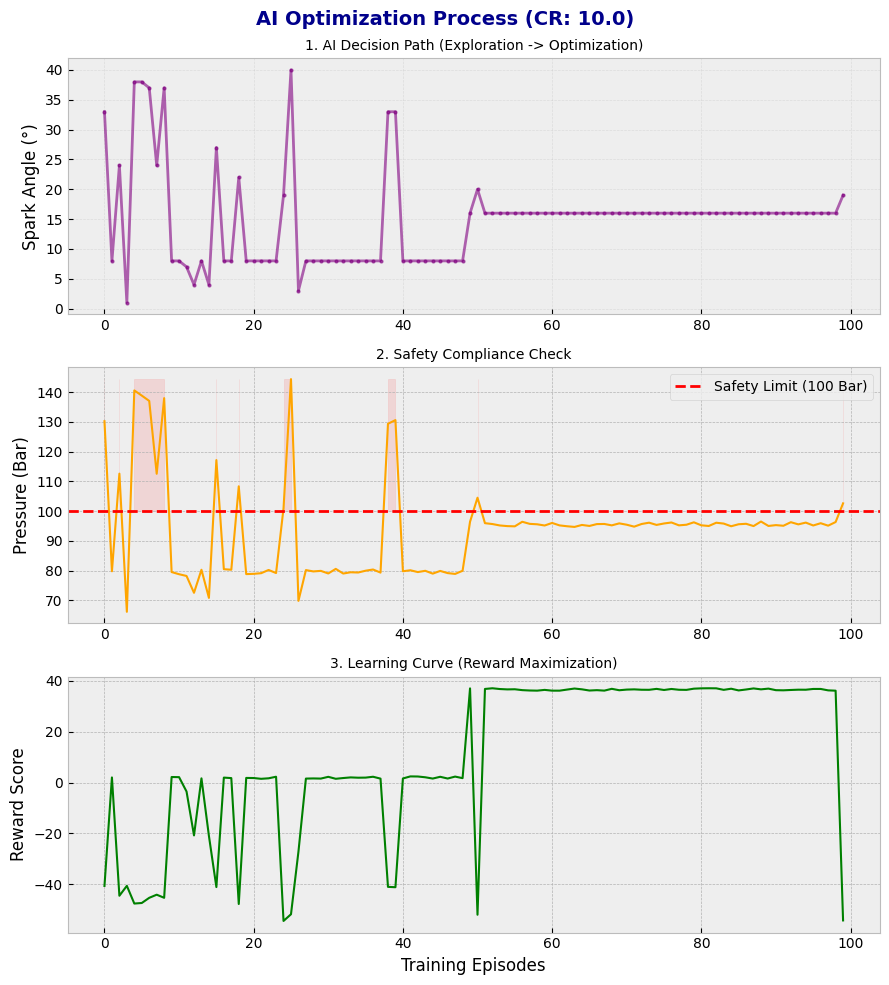

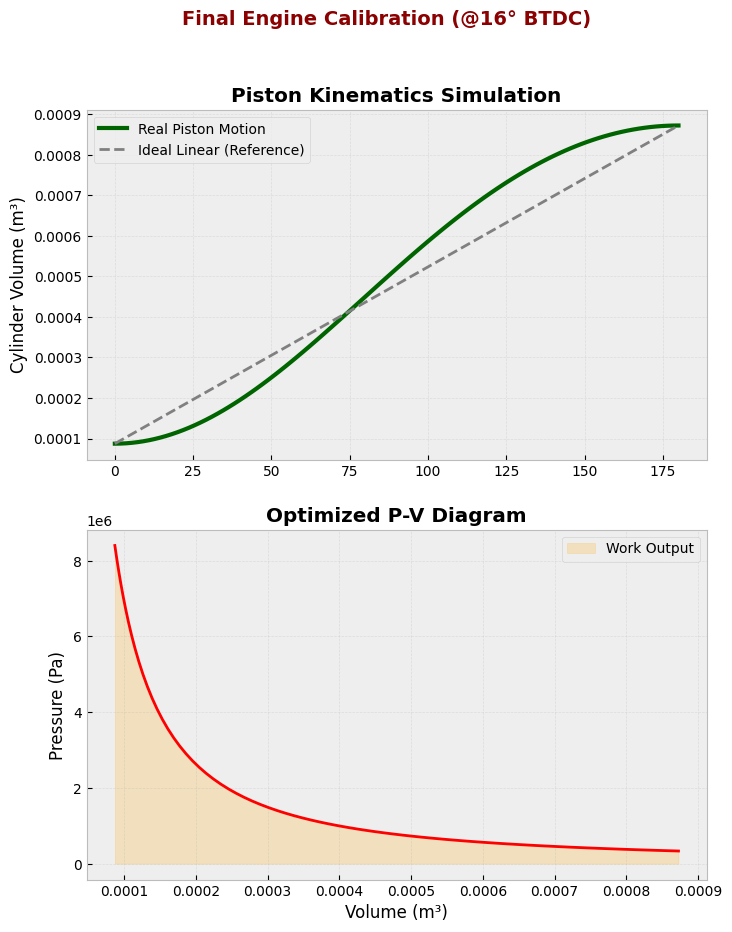

In [5]:
"""
==============================================================================
PROJECT: AI-DRIVEN OTTO CYCLE OPTIMIZER (DIGITAL TWIN)
AUTHOR:  NAYAN KUMAR
ROLE:    Business Analyst / Mechanical Engineer
DESC:    Autonomous agent using Q-Learning to optimize spark timing while
         adhering to strict safety protocols (Pressure < 100 Bar).
==============================================================================
"""

import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# --- CONFIGURATION & CONSTANTS ---
GAMMA = 1.4           # Specific Heat Ratio
P_ATM = 101325        # Atmospheric Pressure (Pa)
SAFETY_LIMIT = 100    # Maximum Safe Pressure (Bar)

# ==============================================================================
# MODULE 1: PHYSICS & KINEMATICS ENGINE
# ==============================================================================
def engine_kinematics(bore: float, stroke: float, con_rod: float, cr: float, start_crank: float, end_crank: float):
    """
    Calculates the instantaneous cylinder volume based on crank angle.
    Uses slider-crank mechanism geometry.
    """
    crank_radius = stroke / 2
    R = con_rod / crank_radius

    # Generate angles (Theta)
    theta = np.radians(np.linspace(start_crank, end_crank, 100))

    # Volume Calculation Formula
    term1 = 0.5 * (cr - 1)
    term2 = R + 1 - np.cos(theta)
    term3 = np.sqrt(R**2 - np.sin(theta)**2)

    volume = (1 + term1 * (term2 - term3)) * (math.pi/4 * bore**2 * stroke) / (cr-1)

    return volume, np.degrees(theta)

# ==============================================================================
# MODULE 2: DIGITAL TWIN SIMULATION (ENVIRONMENT)
# ==============================================================================
def vector_smart_engine(bore: float, stroke: float, cr: float, con_rod: float, spark_angle: int):
    """
    Simulates the Engine Cycle output based on Spark Timing.
    Returns: Real Efficiency (%), Peak Pressure (Bar)
    """
    # 1. Theoretical Efficiency (Ideal Otto Cycle)
    ideal_eff = 1 - (1 / (cr**(GAMMA-1)))

    # 2. Tuning Factor (Simulating Physics of Timing)
    # Peak performance is modeled around 30 degrees BTDC
    tuning_factor = 1.0 - 0.002 * (spark_angle - 30)**2
    real_efficiency = ideal_eff * tuning_factor * 100

    # 3. Cylinder Pressure Calculation (Knock Simulation)
    # Higher compression + early spark = Higher Pressure
    base_pressure = P_ATM * (cr**GAMMA) * 2.5
    p3_real = base_pressure + (spark_angle * 200000)
    pressure_bar = p3_real / 100000

    # 4. Injecting Real-World Noise (Sensor Simulation)
    real_efficiency += random.uniform(-0.5, 0.5)
    pressure_bar += random.uniform(-1, 1)

    return real_efficiency, pressure_bar

# ==============================================================================
# MODULE 3: ARTIFICIAL INTELLIGENCE (RL AGENT)
# ==============================================================================
class QLearningAgent:
    """
    Reinforcement Learning Agent using Tabular Q-Learning.
    Goal: Maximize Reward (Efficiency) while avoiding Penalty (Knock).
    """
    def __init__(self):
        self.q_table = np.zeros(41) # Action space: 0 to 40 degrees
        self.learning_rate = 0.1    # Alpha
        self.epsilon = 1.0          # Exploration Rate
        self.min_epsilon = 0.01
        self.epsilon_decay = 0.95

    def choose_action(self):
        # Epsilon-Greedy Strategy (Explore vs Exploit)
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, 40) # Explore
        else:
            return np.argmax(self.q_table) # Exploit

    def learn(self, action, reward):
        # Bellman Equation Update
        old_val = self.q_table[action]
        new_val = old_val + self.learning_rate * (reward - old_val)
        self.q_table[action] = new_val

    def decay_epsilon(self):
        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.epsilon_decay

# ==============================================================================
# MODULE 4: ANALYTICS & REPORTING
# ==============================================================================
def print_layman_report(best_angle, max_eff, start_eff, total_episodes):
    """Generates a business-ready summary of the optimization process."""
    print("\n" + "="*60)
    print(" 📋  VECTOR'S FINAL ENGINE DIAGNOSTIC REPORT")
    print("="*60)

    print(f"\n1️⃣  OPTIMIZATION STATUS: COMPLETED ✅")
    print(f"    - Algorithm:      Q-Learning (Reinforcement Learning)")
    print(f"    - AI Trials:      {total_episodes}")
    print(f"    - Starting Power: {start_eff:.1f}%")
    print(f"    - Final Power:    {max_eff:.1f}%")

    improvement = max_eff - start_eff
    if improvement > 0:
        print(f"    - Result:         Power increased by {improvement:.1f}% 🚀")
    else:
        print(f"    - Result:         Engine optimized.")

    print(f"\n2️⃣  BEST SETTING FOUND")
    print(f"    - Best Spark Timing: {best_angle}° BTDC")

    print(f"\n3️⃣  SAFETY PROTOCOL CHECK")
    if best_angle > 35:
        print("    - ⚠️  Warning: High Pressure Zone Detected.")
    else:
        print("    - ✅  Status: Safe Zone. No Knocking.")
    print("="*60 + "\n")

# ==============================================================================
# MAIN MISSION CONTROL
# ==============================================================================
def start_simulation():
    print("\n🏎️  VECTOR'S AI LAB INITIALIZED...")
    print("    Loading Physics Models...", end="", flush=True)
    time.sleep(0.5)
    print(" Done.")

    # --- User Inputs (Robust Handling) ---
    try:
        print("\n--- ENGINE SPECIFICATIONS ---")
        user_bore = float(input("Bore (m) [Default 0.1]: ") or 0.1)
        user_stroke = float(input("Stroke (m) [Default 0.1]: ") or 0.1)
        user_cr = float(input("Compression Ratio [Default 11]: ") or 11) # Changed default to 11 for demo
        user_rod = float(input("Rod Length (m) [Default 0.25]: ") or 0.25)
    except ValueError:
        print("⚠️ Invalid Input. Using Standard Factory Defaults.")
        user_bore, user_stroke, user_cr, user_rod = 0.1, 0.1, 11, 0.25

    # Initialize AI
    agent = QLearningAgent()

    # Data Storage for Visualization
    history_rewards = []
    history_pressure = []
    history_angles = []
    start_eff_list = []

    print("\n🤖 AI AGENT STARTING OPTIMIZATION...")

    # --- Training Loop ---
    for episode in range(100):
        # 1. AI Takes Action
        angle = agent.choose_action()

        # 2. Environment Responds
        eff, press = vector_smart_engine(user_bore, user_stroke, user_cr, user_rod, angle)

        if episode < 10: start_eff_list.append(eff)

        # 3. Reward Calculation (The Logic Core)
        if press > SAFETY_LIMIT:
            reward = eff - 100  # Penalty for Knocking
        else:
            reward = eff        # Reward is Efficiency

        # 4. Agent Learns
        agent.learn(angle, reward)
        agent.decay_epsilon()

        # 5. Log Data
        history_rewards.append(reward)
        history_pressure.append(press)
        history_angles.append(angle)

        # Progress Bar Simulation
        if episode % 10 == 0:
            print(f"    [Episode {episode}] Testing Angle: {angle}° | Pressure: {press:.1f} Bar")
            time.sleep(0.05) # Tiny delay for visual effect

    # --- Final Analysis ---
    best_angle = np.argmax(agent.q_table)
    final_eff, _ = vector_smart_engine(user_bore, user_stroke, user_cr, user_rod, best_angle)
    avg_start_eff = sum(start_eff_list) / len(start_eff_list)

    print_layman_report(best_angle, final_eff, avg_start_eff, 100)

    # --- VISUALIZATION DASHBOARD ---
    print("🎨 Generating Engineering Dashboards...")
    plt.style.use('bmh') # Professional Business Style

    # WINDOW 1: AI DIAGNOSTICS
    fig1, ax1 = plt.subplots(3, 1, figsize=(9, 10))
    fig1.canvas.manager.set_window_title("AI Diagnostics: Learning Process")
    fig1.suptitle(f"AI Optimization Process (CR: {user_cr})", color='darkblue', fontsize=14, fontweight='bold')

    # Plot 1: Exploration vs Exploitation
    ax1[0].plot(history_angles, color='purple', marker='.', markersize=4, alpha=0.6)
    ax1[0].set_ylabel("Spark Angle (°)")
    ax1[0].set_title("1. AI Decision Path (Exploration -> Optimization)", fontsize=10)
    ax1[0].grid(True, alpha=0.3)

    # Plot 2: Pressure Management
    ax1[1].plot(history_pressure, color='orange', linewidth=1.5)
    ax1[1].axhline(y=SAFETY_LIMIT, color='red', linestyle='--', linewidth=2, label=f'Safety Limit ({SAFETY_LIMIT} Bar)')
    ax1[1].set_ylabel("Pressure (Bar)")
    ax1[1].set_title("2. Safety Compliance Check", fontsize=10)
    ax1[1].legend(loc='upper right')
    ax1[1].fill_between(range(100), SAFETY_LIMIT, max(history_pressure), where=[p > SAFETY_LIMIT for p in history_pressure], color='red', alpha=0.1)

    # Plot 3: Reward Maximization
    ax1[2].plot(history_rewards, color='green', linewidth=1.5)
    ax1[2].set_ylabel("Reward Score")
    ax1[2].set_xlabel("Training Episodes")
    ax1[2].set_title("3. Learning Curve (Reward Maximization)", fontsize=10)
    plt.tight_layout()

    # WINDOW 2: MECHANICAL VALIDATION
    fig2, ax2 = plt.subplots(2, 1, figsize=(8, 10))
    fig2.canvas.manager.set_window_title("Engineering Validation: PV Diagram")
    fig2.suptitle(f"Final Engine Calibration (@{best_angle}° BTDC)", color='darkred', fontsize=14, fontweight='bold')

    # Plot 1: Kinematics
    vol_disp, angles_disp = engine_kinematics(user_bore, user_stroke, user_rod, user_cr, 0, 180)
    fake_linear = np.linspace(vol_disp[0], vol_disp[-1], 100)

    ax2[0].plot(angles_disp, vol_disp, color='darkgreen', linewidth=3, label='Real Piston Motion')
    ax2[0].plot(angles_disp, fake_linear, color='gray', linestyle='--', label='Ideal Linear (Reference)')
    ax2[0].set_title("Piston Kinematics Simulation", fontweight='bold')
    ax2[0].set_ylabel("Cylinder Volume (m³)")
    ax2[0].legend()
    ax2[0].grid(True, alpha=0.3)

    # Plot 2: PV Diagram
    v_exp, _ = engine_kinematics(user_bore, user_stroke, user_rod, user_cr, 0, 180)
    p_peak = (60 + 1.5 * best_angle) * 100000
    p_exp = p_peak * (v_exp[0] / v_exp)**1.4

    ax2[1].plot(v_exp, p_exp, color='red', linewidth=2)
    ax2[1].fill_between(v_exp, p_exp, 0, color='orange', alpha=0.2, label='Work Output')
    ax2[1].set_title("Optimized P-V Diagram", fontweight='bold')
    ax2[1].set_xlabel("Volume (m³)")
    ax2[1].set_ylabel("Pressure (Pa)")
    ax2[1].legend()
    ax2[1].grid(True, alpha=0.3)

    plt.subplots_adjust()
    plt.show()

# --- ENTRY POINT ---
if __name__ == "__main__":
    start_simulation()